In [1]:
import pandas as pd
base = pd.read_csv('census.csv')


In [2]:
base.head()


,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
def income_converter_for_boolean(label):
    return (0, 1)[label == ' >50K']


In [4]:
base['income'] = base['income'].apply(income_converter_for_boolean)


In [5]:
base['income'].unique()


array([0, 1], dtype=int64)

In [6]:
predictors_attributes = base.drop('income', axis=1)


In [7]:
predictors_attributes.head()


,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [8]:
responses = base['income']


In [9]:
responses.head()


0    0
1    0
2    0
3    0
4    0
Name: income, dtype: int64

<AxesSubplot:>

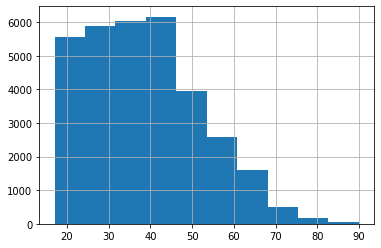

In [10]:
%matplotlib inline
base.age.hist()


In [11]:
import tensorflow as tf


In [12]:
age = tf.feature_column.numeric_column('age')


In [13]:
age_categoric = [tf.feature_column.bucketized_column(age, boundaries=[20, 30, 40, 50, 60, 70, 80,
                                                                      90])]


In [14]:
print(age_categoric)


[BucketizedColumn(source_column=NumericColumn(key='age', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), boundaries=(20, 30, 40, 50, 60, 70, 80, 90))]


In [15]:
predictors_attributes.columns


Index(['age', 'workclass', 'final-weight', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loos', 'hour-per-week', 'native-country'],
      dtype='object')

In [16]:
categoric_columns_name = ['workclass', 'education',
                          'marital-status', 'occupation', 'relationship', 'race', 'sex',
                          'native-country']


In [17]:
categoric_columns = [tf.feature_column.categorical_column_with_vocabulary_list(key = name, 
vocabulary_list = predictors_attributes[name].unique()) for name in categoric_columns_name]

In [18]:
numeric_names_column = ['age', 'final-weight', 'education-num','capital-gain', 'capital-loos',
 'hour-per-week']

In [19]:
numeric_columns = [tf.feature_column.numeric_column(key= name) for name in numeric_names_column]

In [20]:
print(numeric_columns[1])

NumericColumn(key='final-weight', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)


In [21]:
columns = age_categoric + categoric_columns + numeric_columns

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(predictors_attributes, responses, test_size = 
0.3)

In [24]:
def make_input_fn(x, y = None, num_epochs = None, shuffle = True, batch_size = 32):
    def input_function():
        ds = tf.data.Dataset.from_tensor_slices((dict(x), y))
        if shuffle:
            ds = ds.shuffle(1000)
        ds = ds.batch(batch_size).repeat(num_epochs)
        return ds
    return input_function

In [25]:
train_function = make_input_fn(x_train, y_train)

In [26]:
classifier = tf.estimator.LinearClassifier(feature_columns = columns)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Matheus\\AppData\\Local\\Temp\\tmpqj67fnf1', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [27]:
classifier.train(input_fn = train_function, steps = 10000)

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
INFO:tensorflow:Calling model_fn.


C:\Users\Matheus\.conda\envs\machine_learning\lib\site-packages\tensorflow\python\keras\engine\base_layer_v1.py:1700: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\Matheus\AppData\Local\Temp\tmpqj67fnf1\model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
INFO:tensorflow:loss = 0.6931472, step = 0
INFO:tensorflow:global_step/sec: 289.018
INFO:tensorflow:loss = 308.9588, step = 100 (0.347 sec)
INFO:tensorflow:global_step/sec: 884.958
INFO:tensorflow:loss = 406.77924, step = 200 (0.113 sec)
INFO:tensorflow:global_step/sec: 904.998
INFO:tensorflow:loss = 86.923256, step = 300 (0.111 sec)
INFO:tensorflow:global_step/sec: 943.392
INFO:tensorflow:loss = 330.58508, step = 400 (0

In [28]:
predict_function = make_input_fn(x_test, num_epochs = 1, shuffle = False)
predicts = classifier.predict(input_fn = predict_function)

In [30]:
list(predicts)

INFO:tensorflow:Calling model_fn.


C:\Users\Matheus\.conda\envs\machine_learning\lib\site-packages\tensorflow\python\keras\engine\base_layer_v1.py:1700: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Matheus\AppData\Local\Temp\tmpqj67fnf1\model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'logits': array([37.452263], dtype=float32),
  'logistic': array([1.], dtype=float32),
  'probabilities': array([5.428613e-17, 1.000000e+00], dtype=float32),
  'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object),
  'all_class_ids': array([0, 1]),
  'all_classes': array([b'0', b'1'], dtype=object)},
 {'logits': array([-43.243347], dtype=float32),
  'logistic': array([1.6582613e-19], dtype=float32),
  'probabilities': array([1.0000000e+00, 1.6582613e-19], dtype=float32),
  'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'all_class_ids': array([0, 1]),
  'all_classes': array([b'0', b'1'], dtype=object)},
 {'logits': array([-99.46426], dtype=float32),
  'logistic': array([0.], dtype=float32),
  'probabilities': array([1., 0.], dtype=float32),
  'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'all_class_ids': array([0, 1]),
  'all_classes': array([b'0', b'1'], dtype=object)},
 {'logits': array([

In [32]:
results = []
for p in classifier.predict(input_fn = predict_function):
    results.append(p['class_ids'])

INFO:tensorflow:Calling model_fn.


C:\Users\Matheus\.conda\envs\machine_learning\lib\site-packages\tensorflow\python\keras\engine\base_layer_v1.py:1700: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Matheus\AppData\Local\Temp\tmpqj67fnf1\model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [ ]:
from sklearn.metrics import accuracy_score
sucess_tax = accuracy_score(y_test, results)
sucess_tax